## 2. Logistic Regression
    

    Let us understand the Logistic Regression model below.
    
    * This refers to a regression model that is used for classification.
    
    * This method is widely used for binary classification problems. It can also be extended to multi-class classification problems.
    Here, the dependent variable is categorical: y ϵ {0, 1}
    
    * A binary dependent variable can have only two values, like 0 or 1, win or lose, pass or fail, healthy or sick, etc
    
    * In this case, you model the probability distribution of output y as 1 or 0. This is called the sigmoid probability (σ).
    If σ(θ Tx) > 0.5, set y = 1, else set y = 0
    
    * Unlike Linear Regression (and its Normal Equation solution), there is no closed form solution for finding optimal weights of Logistic Regression. Instead, you must solve this with maximum likelihood estimation (a probability model to detect the maximum likelihood of something happening).
    
    * It can be used to calculate the probability of a given outcome in a binary model, like the probability of being classified as sick or passing an exam.
   ![alt text](lr.png "Title")


### Implementation:

### Step 1: Import Packages, Functions, and Classes

    First, you have to import Matplotlib for visualization and NumPy for array operations. You’ll also need LogisticRegression, classification_report(), and confusion_matrix() from scikit-learn:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


### Step 2: Get Data
    In practice, you’ll usually have some data to work with. For the purpose of this example, let’s just create arrays for the input (𝑥) and output (𝑦) values:

In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])


    The input and output should be NumPy arrays (instances of the class numpy.ndarray) or similar objects. numpy.arange() creates an array of consecutive, equally-spaced values within a given range. 
    The array x is required to be two-dimensional. It should have one column for each input, and the number of rows should be equal to the number of observations. To make x two-dimensional, you apply .reshape() with the arguments -1 to get as many rows as needed and 1 to get one column.

### Step 3: Create a Model and Train It
    Once you have the input and output prepared, you can create and define your classification model. You’re going to represent it with an instance of the class LogisticRegression:

In [4]:
model = LogisticRegression(solver='liblinear', random_state=0)


    The above statement creates an instance of LogisticRegression and binds its references to the variable model.  LogisticRegression has several optional parameters that define the behavior of the model and approach. For the sake of simplicity we are considering only two of these:
    

    random_state is an integer, an instance of numpy.RandomState, or None (default) that defines what pseudo-random number generator to use.

    solver is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.
    
    Once the model is created, you need to fit (or train) it.


In [5]:
model.fit(x, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Step 4: Evaluate the Model

    Once a model is defined, you can check its performance with .predict_proba(), which returns the matrix of probabilities that the predicted output is equal to zero or one:

In [6]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

    In the matrix above, each row corresponds to a single observation. The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). The second column is the probability that the output is one, or 𝑝(𝑥).

    You can get the actual predictions, based on the probability matrix and the values of 𝑝(𝑥), with .predict():

In [7]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

    The figure below illustrates the input, output, and classification results:
   ![alt text](lr2.png "Title")


    The green circles represent the actual responses as well as the correct predictions. The red × shows the incorrect prediction. The full black line is the estimated logistic regression line 𝑝(𝑥). The grey squares are the points on this line that correspond to 𝑥 and the values in the second column of the probability matrix. The black dashed line is the logit 𝑓(𝑥).

    The value of 𝑥 slightly above 2 corresponds to the threshold 𝑝(𝑥)=0.5, which is 𝑓(𝑥)=0. This value of 𝑥 is the boundary between the points that are classified as zeros and those predicted as ones.

    For example, the first point has input 𝑥=0, actual output 𝑦=0, probability 𝑝=0.26, and a predicted value of 0. The second point has 𝑥=1, 𝑦=0, 𝑝=0.37, and a prediction of 0. Only the fourth point has the actual output 𝑦=0 and the probability higher than 0.5 (at 𝑝=0.62), so it’s wrongly classified as 1. All other values are predicted correctly.

    When you have nine out of ten observations classified correctly, the accuracy of your model is equal to 9/10=0.9, which you can obtain with .score():



In [8]:
model.score(x, y)

0.9

    .score() takes the input and output as arguments and returns the ratio of the number of correct predictions to the number of observations.

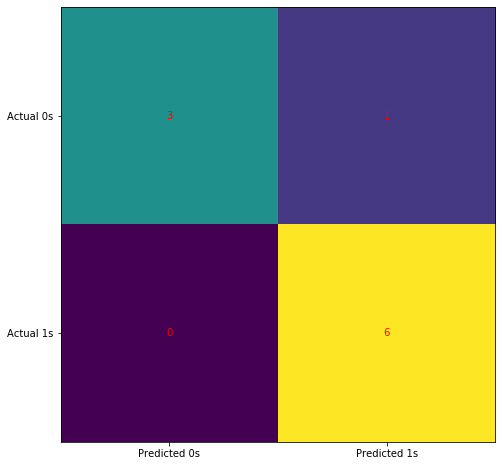

In [10]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


    The obtained matrix shows the following:

    Three true negative predictions: The first three observations are zeros predicted correctly.
    No false negative predictions: These are the ones wrongly predicted as zeros.
    One false positive prediction: The fourth observation is a zero that was wrongly predicted as one.
    Six true positive predictions: The last six observations are ones predicted correctly.


## TO-DO LIST:
    1) Try it with some real data set.
    2) Try this to classify spam/ham mails. (Sentimental analysis )
    3) Try to change the hyper-parameters and see how it affects the results